# Notebook de nettoyage - Adrian Rodriguez - Projet 2 parcours Ingénieur Machine Learning

---
# 0. Contexte

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Je souhaite proposer une idée d’application.

Les changements de modes de vie s'accompagnent d'une réduction du temps de préparation des repas à domicile (- 25 % entre 1986 et 2010) et profitent à des produits faciles d'emploi, tels que les pizzas ou les desserts lactés frais.

Chacun des produits dispose d'une étiquette nutritionnelle. Cette étiquette informe le consommateur final des points suivants :
- des valeurs du contenu en énergie (kj/kcal) et en nutriments (valeurs en gramme ou miligramme pour 100g de produit),
- de la liste des ingrédients.

Hélène Baribeau, nutritioniste, dit qu'un aliment est considéré comme riche en calories quand il dépasse 300 calories pour 100 g

Les calories traduisent la valeur énergétique d’un aliment, qui peut aussi être exprimée en kilojoules (kJ). Les besoins quotidiens en calories varient selon le sexe, l'âge, la corpulence, la dépense physique et l'état de santé.

| Age, activité   | Homme | Femme |
|:----------|:-------:|:------:|
| Enfant de 1 à 3 ans | 1360 kcal | 1360 kcal |
| Adolescents de 13 à 15 ans | 2890 kcal | 2480 kcal |
| Adulte avec activité faible | 2100 kcal | 1800 kcal |
| Adulte avec activité moyenne | 2700 kcal | 2000 kcal |
| Adulte avec activité intense | 3000 kcal | 2200 kcal |

Si on absorbe plus d’énergie que nécessaire et que toutes les réserves sont saturées (notamment pour les glycogènes), le corps va le stocker sous forme de graisse. Un excès de graisse peut entrainer des problèmes de santé.

Les problèmes de maladies cardiovasculaires et de diabètes sont présents au quotidien pour des millions de français. L'alimentation saine est un des enjeux majeurs de la société d'aujourd'hui. J'envisage de développer une application permettant d'accompagner le consommateur final dans ses choix de produits alimentaires, en fonction de ses caractéristiques personnelles.

Il s'agira de répondre à la question suivante : 
- Est-ce qu’il est possible de définir des catégories de produits en fonction leur apport en énergie ?

Mon rôle sera de d'étudier la faisabité d'une telle application à partir des données présentes sur Open Food Fact. En savoir plus https://fr.openfoodfacts.org/decouvrir

---
# 1. Importation et exploration préliminaire

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
food_raw = pd.read_csv('src/products.csv', sep='\t', low_memory=False)

In [3]:
# Vérification du nombre de variables et d'observations
food_raw.shape

(1359349, 181)

In [4]:
# Vérification de l'importation
food_raw.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,1569.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
food_raw.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.359349e+06,1.359349e+06,0.0,0.0,4.328970e+05,0.0,620860.000000,620860.000000,0.0,620860.000000,0.0,557879.000000,534160.000000,9.804500e+04,1.029090e+06,1.101353e+06,966.000000,1.094266e+06,1.046421e+06,1.0,0.0,1.0,4.000000,9.000000,1.0,3.000000,1.0,22.000000,7.000000,0.0,3.000000,2.000000,0.0,46240.000000,46271.000000,1702.000000,344.000000,102.000000,139.000000,399.000000,200.000000,30.000000,5.00000,1.00,44.000000,22.000000,0.0,0.0,0.0,0.0,0.0,263839.000000,267792.00000,1.093717e+06,1.073169e+06,121.000000,52.000000,72.000000,550.000000,9.000000,17.000000,399.000000,3411.000000,436143.000000,3593.000000,3323.000000,1.095683e+06,40.000000,36.000000,13.000000,1.079332e+06,1.079324e+06,14905.000000,211595.000000,72.000000,8842.000000,2794.000000,1047.000000,219108.000000,22911.000000,21997.000000,23154.000000,15335.000000,9709.000000,8424.000000,1.194400e+04,892.000000,5728.000000,104.000000,327.000000,91139.000000,597.000000,267872.000000,13305.000000,263552.000000,14121.000000,9832.000000,4143.000000,3907.000000,2.750000e+02,2351.000000,144.000000,200.000000,1915.000000,353.000000,122.000000,150.00000,6022.000000,288.000000,11100.000000,293.000000,5205.000000,2.000000,415.000000,10139.000000,557888.000000,44.000000,3.000000,0.0,37.000000,1708.000000,23.000000,39.000000,17.000000
mean,1.534876e+09,1.568113e+09,NaN,NaN,2.566687e+16,NaN,2.034961,0.020882,NaN,0.069990,NaN,9.207190,3.447566,6.798469e+37,3.534801e+07,6.052155e+36,354.678882,1.389458e+01,5.232650e+00,0.0,NaN,7.4,3.225000,37.393859,18.9,2.702393,3.0,6.277267,2.235397,NaN,1.333333,31.000000,NaN,9.445503,5.806469,4.373313,2.787559,1.646188,0.524027,14.112477,3.838780,0.921748,0.85900,4.77,36.051716,26.383941,NaN,NaN,NaN,NaN,NaN,0.046590,0.04632,2.876872e+01,1.406166e+01,13.460248,8

A ce stade, je fais plusieurs constatations :
- Des observations n'ont rien à voir avec des produits alimentaires, (https://fr.openfoodfacts.org/produit/999999999999999/dentifrice)
- Des données sont incohérentes entre valeur énergétique et nutriments,
- D'autres données sont incohérentes, notamment à propos des nutriments seuls. Il ne peut pas y avoir 4,8 kg de sucre dans 100g d'aliments, ou encore 105 kg de sel dans 100g d'aliments. Certaines de ces valeurs sont négatives.

J'en conclus que les données sont librement saisies par l'internaute, sans vérification par un tiers avant publication.

Dans le cadre de notre projet, nous nous attarderons sur les variables exprimant les valeurs du contenu en énergie et en nutriments.

Afin d'obtenir un jeu de données propre et adapté à notre projet d'application, je vais retirer de l'étude les observations dont :
- le contenu contient de l'alcool (exprimé en volume et pas en grammes / non nécéssaire au fonctionnement du corps)
- le pays de distribution n'est pas la France.
- les valeurs énergétiques sont différentes de la somme des nutriments, avec une tolérance de 5 %,
- les valeurs des variable incohérentes.

Je finirai par une catégorisation des produits et le traitement des valeurs manquantes.

Je commence par segmenter les variables.

In [6]:
# Découverte des variables
for col in food_raw.columns:
    print(col)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
main_category
main_category_en
image_url
image_small_url
image_ingredients_url
image_in

La notice du jeu de données n'est pas mis à jour. Certaines variables qui y sont indiqués ne sont plus existantes. Certaines nouvelles n'y sont peut-être pas mentionnées. Je ne m'appuierai sur les informations fournies qu'à condition que je puisse les vérifier.

In [7]:
# Export CSV des dimensions pour faciliter l'intégration au dictionnaire
food_raw.dtypes.to_csv('src/types.csv')
food_raw.dtypes

code                   object
url                    object
creator                object
created_t               int64
created_datetime       object
                       ...   
choline_100g          float64
phylloquinone_100g    float64
beta-glucan_100g      float64
inositol_100g         float64
carnitine_100g        float64
Length: 181, dtype: object

Je décide de créer un dictionnaire de données afin de compléter les informations. Après quelques recherches, je procède à une classification des variables :
- Informations générales
- Valeur énergétique
- Nutriment energétique
- Nutriment non énérgétique
- Divers

Ces nouvelles informations sont stockés dans un tableur Excel que j'intègre dans le cadre de l'étude

In [8]:
dim = pd.read_excel('src/dictionnaire.xlsx', sheet_name='dim')
dim

,Variables,Types,Catégorie,Variable parente,Calcul energy
0,code,object,Informations générales,NaN,NaN
1,url,object,Informations générales,NaN,NaN
2,creator,object,Informations générales,NaN,NaN
3,created_t,int64,Informations générales,NaN,NaN
4,created_datetime,object,Informations générales,NaN,NaN
...,...,...,...,...,...
176,choline_100g,float64,Divers,NaN,NaN
177,phylloquinone_100g,float64,Divers,NaN,NaN
178,beta-glucan_100g,float64,Divers,NaN,NaN
179,inositol_100g,float64,Divers,NaN,NaN


In [9]:
energy = dim['Variables'][dim['Catégorie'] == "Valeur énergétique"].tolist()
energy

['energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g']

In [10]:
energy_fact = dim['Variables'][dim['Catégorie'] == "Nutriment énergétique"].tolist()
len(energy_fact)

53

In [11]:
energy_calc_short = dim['Variables'][dim['Calcul energy'] == "Oui"].tolist()
energy_calc_short

['fat_100g', 'carbohydrates_100g', 'proteins_100g']

In [12]:
energy_calc = ['energy-kj_100g','energy-kcal_100g'] + energy_calc_short
energy_calc

['energy-kj_100g',
 'energy-kcal_100g',
 'fat_100g',
 'carbohydrates_100g',
 'proteins_100g']

Je récupère également les données de catégorisation manuelle des produits

In [13]:
cat = pd.read_excel('src/dictionnaire.xlsx', sheet_name='cat').set_index('keyword').to_dict()
cat

{'category': {'plant-based': 'Vegan',
  'base de végétaux': 'Vegan',
  'origen vegetal': 'Vegan',
  'viande': 'Viandes - Poissons - Oeufs',
  'produits de la mer': 'Viandes - Poissons - Oeufs',
  'meat': 'Viandes - Poissons - Oeufs',
  'seafood': 'Viandes - Poissons - Oeufs',
  'poisson': 'Viandes - Poissons - Oeufs',
  'élevage': 'Viandes - Poissons - Oeufs',
  'jambon': 'Viandes - Poissons - Oeufs',
  'laitier': 'Produits laitiers',
  'dairies': 'Produits laitiers',
  'beaufort': 'Produits laitiers',
  'préparé': 'Epicerie - Plats préparés',
  'snack': 'Epicerie - Plats préparés',
  'sandwich': 'Epicerie - Plats préparés',
  'meal': 'Epicerie - Plats préparés',
  'epicerie': 'Epicerie - Plats préparés',
  'chips': 'Epicerie - Plats préparés',
  'pizza': 'Epicerie - Plats préparés',
  'pâtés': 'Epicerie - Plats préparés',
  'plat': 'Epicerie - Plats préparés',
  'repas': 'Epicerie - Plats préparés',
  'kit': 'Epicerie - Plats préparés',
  'groceries': 'Epicerie - Plats préparés',
  'c

J'ai maintenant une ligne directrice de nettoyage, et mes variables sont segmentées pour faciliter le travail

In [14]:
food = food_raw

---
# 2. Retrait des observations contenant de l'alcool

In [15]:
food['alcohol_100g'].describe()

count    14905.000000
mean         4.911992
std         10.134822
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max        400.000000
Name: alcohol_100g, dtype: float64

In [16]:
food = food[(food['alcohol_100g'] == 0) | (food['alcohol_100g'].isna())]

In [17]:
food['alcohol_100g'].describe()

count    8819.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: alcohol_100g, dtype: float64

Les produits contenant de l'alcool ne sont plus dans l'étude

---
# 3. Sélection des produits distribués en France

In [18]:
food = food[food['countries'].str.find('France') != -1]

In [19]:
food.shape

(467846, 181)

In [20]:
print('A ce stade, il reste ' + str( round(len(food) / len(food_raw),2)*100) + ' % du jeu de données initial')

A ce stade, il reste 34.0 % du jeu de données initial


---
# 4. Vérification de la cohérence entre la valeur énergétique et les facteurs nutritionnels
Je procède à cette vérification car les données sont saisies manuellement par le consommateur final. Suite à un test d'intégration, les données sont publiées sans vérification. Les procédures de vérification des données ne sont pas publiées

In [21]:
food[energy].notna().sum()

energy-kj_100g           56240
energy-kcal_100g        357358
energy_100g             398054
energy-from-fat_100g       111
dtype: int64

Je dispose de 4 colonnes energy comprenant les valeurs énergétiques de chaque produit :
- `energy_100g`,
- `energy-kcal_100g`,
- `energy-kj_100g`,
- `energy-from-fat_100g`.


L'unité de la colonne `energy_100g` n'est pas indiquée. `energy-from-fat_100g` est très peu renseignée. Ces variables sont retirée de l'étude.

In [22]:
energy.remove('energy_100g')
energy.remove('energy-from-fat_100g')

In [23]:
food[energy]

,energy-kj_100g,energy-kcal_100g
0,NaN,1569.0
1,NaN,NaN
3,936.0,NaN
4,NaN,NaN
5,NaN,88.0
...,...,...
1359336,NaN,1448.0
1359337,NaN,1469.0
1359341,NaN,1393.0
1359343,NaN,548.0


In [24]:
food[energy].describe()

,energy-kj_100g,energy-kcal_100g
count,5.624000e+04,357358.000000
mean,7.230510e+03,1150.962336
std,1.457603e+06,822.655407
min,0.000000e+00,0.000000
25%,4.380000e+02,460.000000
50%,9.780000e+02,1105.000000
75%,1.608000e+03,1674.000000
max,3.456712e+08,99600.000000


In [25]:
food[energy][food['energy-kj_100g'].notna() & food['energy-kcal_100g'].notna()]

,energy-kj_100g,energy-kcal_100g
371,2318.0,2347.0
372,1104.0,1121.0
1417,137.0,138.0
12140,67.0,0.0
15736,1299.0,1197.0
...,...,...
1358404,1663.0,1644.0
1358464,353.0,1477.0
1359067,1203.0,1213.0
1359168,188.0,188.0


Pour une observation, les deux colonnes kcal et kj peuvent contenir des valeurs similaires alors que 1 kcal = 4.184 kj (Source : convertisseur Google). 

Je veux être sûr de ces valeurs, ainsi que de leur unité. Je dois vérifier la cohérence entre la valeur énergétique et les facteurs nutritionnels.

Je procède comme suit : 
- 1/ Je calcule la valeur énergétique selon les facteurs nutritionnels renseignés,
- 2/ Je compare le résultat obtenu avec les valeurs kj et kcal (si c'est cohérent, je conserve l'observation, sinon je la rejette),
- 3/ Je convertis les valeurs kj en kcal et je stocke les résultats dans kcal.

La colonne `energy-kcal_100g` servira de référence.

## 4-1. Calcul théorique la valeur énergétique selon les faits nutritionnels renseignés

Un produit se compose de 3 familles apportant de la valeur énergétique ; les lipides (fat_100g), les glucides (carbohydrates_100g), et les protéines (proteins_100g). 

Leur apport énergétique se définit dans le tableau suivant :

| Substances   | kJ/g | kcal/g |
|:----------|:-------:|:------:|
| Lipides | 37 | 9 |
| Protéines | 17 | 4 |
| Glucides | 17 | 4 |

Par exemple, 1g de lipides apporte 9kcal. Source : https://fr.wikipedia.org/wiki/Valeur_%C3%A9nerg%C3%A9tique. Ces informations sont confirmées par d'autres sources.

A titre d'information, les polyols et les fibres font partie de la familles des glucides. L'éthanol est de l'alcool et ne fait donc pas partie de l'étude.

In [26]:
# Je crée un dictionnaire de substances en kcal
substances_kcal = {"fat": 9, 
                   "proteins": 4, 
                   "carbohydrates": 4}

# Je vérifie
for i in substances_kcal.items():
    print(i)

('fat', 9)
('proteins', 4)
('carbohydrates', 4)


In [27]:
# Création d'une colonne strong pour marquer les observations vérifiées. Elles sont non vérifiées par défaut
food["verify"] = False

In [28]:
# Je dresse une table qui me permette de visualiser les observations détenant des valeurs extrèmes.
food[['verify'] + energy_calc].sort_values(by='energy-kcal_100g', ascending=False)

,verify,energy-kj_100g,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g
1089607,False,99300.0,99600.0,0.0,9700.0,0.0
488894,False,NaN,19305.0,19.0,61.0,7.5
1358816,False,NaN,19246.0,2.0,5.0,3.0
147700,False,NaN,16786.0,15.0,1.0,0.0
1127791,False,NaN,14242.0,92.0,0.5,0.5
...,...,...,...,...,...,...
1359307,False,NaN,NaN,NaN,NaN,NaN
1359308,False,NaN,NaN,NaN,NaN,NaN
1359310,False,NaN,NaN,NaN,NaN,NaN
1359323,False,NaN,NaN,NaN,NaN,NaN


In [29]:
# Taux de remplissage des variables
nbr_obs = food['code'].count()
print("energy-kj_100g : " + str(round((food['energy-kj_100g'].count() / nbr_obs) * 100,1)) + " %\r\n" + 
      "energy-kcal_100g : " + str(round((food['energy-kcal_100g'].count() / nbr_obs) * 100,1)) + " %\r\n" +
      "---\r\n" + 
      "fat_100g : " + str(round((food['fat_100g'].count() / nbr_obs) * 100,1)) + " %\r\n" + 
      "proteins_100g : " + str(round((food['proteins_100g'].count() / nbr_obs) * 100,1)) + " %\r\n" + 
      "carbohydrates_100g : " + str(round((food['carbohydrates_100g'].count() / nbr_obs) * 100,1)) + " %\r\n")

energy-kj_100g : 12.0 %
energy-kcal_100g : 76.4 %
---
fat_100g : 84.5 %
proteins_100g : 84.9 %
carbohydrates_100g : 84.4 %



In [30]:
# Je stocke les résultats kcal dans energy_tmp
food["energy_tmp"] = (food["fat_100g"].fillna(0) * substances_kcal["fat"] + 
                       food["proteins_100g"].fillna(0) * substances_kcal["proteins"] + 
                       food["carbohydrates_100g"].fillna(0) * substances_kcal["carbohydrates"])

## 4-2. Comparaison des résultats théoriques obtenus (stockés dans `energy_100g`) avec les valeurs kj et kcal

In [31]:
# Paramètrage
ratio = 4.184
tolerance = 0.05 # Taux d'erreur accepté : 5 %
low_level = 1 - tolerance
high_level = 1 + tolerance

In [32]:
# Comparaison tmp avec kcal
compare_kcal = ((food["energy-kcal_100g"] > food["energy_tmp"] * low_level) & 
                (food["energy-kcal_100g"] < food["energy_tmp"] * high_level))

food[['energy_tmp'] + energy_calc][compare_kcal]

,energy_tmp,energy-kj_100g,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g
42047,641.00,NaN,628.0,65.00,13.0,1.0
51791,310.40,NaN,297.0,30.00,6.4,3.7
145598,375.93,NaN,377.0,5.77,77.0,4.0
147643,1222.00,NaN,1260.0,100.00,80.0,0.5
172580,13.40,NaN,13.0,1.00,1.0,0.1
...,...,...,...,...,...,...
1338499,256.10,NaN,251.0,25.70,0.1,6.1
1343576,390.00,NaN,393.0,2.00,23.0,70.0
1347308,13.00,NaN,13.0,1.00,1.0,0.0
1354613,371.50,NaN,377.0,31.50,0.9,21.1


Les observations précédentes sont vérifiées à un taux d'erreur de 5 % maximum.

J'applique NaN à la valeur correspondantes en kj pour éliminer une éventuelles double informations. Je marque les lignes comme vérifiées.

In [33]:
food["energy-kj_100g"][compare_kcal] = np.nan
food["verify"][compare_kcal] = True
food[energy_calc][compare_kcal]

,energy-kj_100g,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g
42047,NaN,628.0,65.00,13.0,1.0
51791,NaN,297.0,30.00,6.4,3.7
145598,NaN,377.0,5.77,77.0,4.0
147643,NaN,1260.0,100.00,80.0,0.5
172580,NaN,13.0,1.00,1.0,0.1
...,...,...,...,...,...
1338499,NaN,251.0,25.70,0.1,6.1
1343576,NaN,393.0,2.00,23.0,70.0
1347308,NaN,13.0,1.00,1.0,0.0
1354613,NaN,377.0,31.50,0.9,21.1


In [34]:
# Comparaison tmp avec kj (Avec application du ration pour la conversion de kcal ver kj)
compare_kj = ((food["energy-kj_100g"] > food["energy_tmp"] * low_level * ratio ) & 
              (food["energy-kj_100g"] < food["energy_tmp"] * high_level * ratio))

food[energy_calc][compare_kj]

,energy-kj_100g,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g
314,450.0,NaN,2.200000,15.3,6.8
315,455.0,NaN,4.200000,12.5,4.4
336,1952.4,NaN,15.300000,75.5,6.8
371,2318.0,2347.0,53.200001,11.7,8.2
372,1104.0,1121.0,27.400000,1.8,1.9
...,...,...,...,...,...
1358464,353.0,1477.0,1.400000,8.9,8.6
1358834,1919.0,NaN,28.000000,45.0,6.8
1358957,1017.0,NaN,11.000000,32.0,3.0
1359067,1203.0,1213.0,24.000000,1.5,17.0


Les observations précédentes sont vérifiées à un taux d'erreur de 5 % maximum.

J'applique NaN à la valeur correspondantes en kcal pour éliminer une éventuelles double informations. Je marque les lignes comme vérifiées.

In [35]:
food["energy-kcal_100g"][compare_kj] = np.nan
food["verify"][compare_kj] = True
food[energy_calc][compare_kj]

,energy-kj_100g,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g
314,450.0,NaN,2.200000,15.3,6.8
315,455.0,NaN,4.200000,12.5,4.4
336,1952.4,NaN,15.300000,75.5,6.8
371,2318.0,NaN,53.200001,11.7,8.2
372,1104.0,NaN,27.400000,1.8,1.9
...,...,...,...,...,...
1358464,353.0,NaN,1.400000,8.9,8.6
1358834,1919.0,NaN,28.000000,45.0,6.8
1358957,1017.0,NaN,11.000000,32.0,3.0
1359067,1203.0,NaN,24.000000,1.5,17.0


In [36]:
print(f"Taux d'observations vérifiées avec un taux d'erreur à 5 % maximum : {str(round((food['code'][food['verify'] == True].count() / nbr_obs) * 100,1))} % des observations testés")

Taux d'observations vérifiées avec un taux d'erreur à 5 % maximum : 9.7 % des observations testés


Ce résultat montre que peut de nombreuses observation ne sont pas fiables, je vais découvrir ce que cela donne avec des seuils de tolérance plus élevé.

In [37]:
# Paramètrage
ratio = 4.184
tolerance = [0.99,0.5,0.2,0.1,0.01,0.05] 
# Max 1 en l'excluant. En se rapprochant de 1, j'accepte une erreur représentant le double ou la moitié de la valeur théorique calculée

for tol in tolerance:
    food['verify'] = False
    low_level = 1 - tol
    high_level = 1 + tol

    # Comparaison de la variable théorique "energy_tmp" avec la colonne KCAL
    compare_kcal = ((food["energy-kcal_100g"] > food["energy_tmp"] * low_level) & 
                    (food["energy-kcal_100g"] < food["energy_tmp"] * high_level))
    food["energy-kj_100g"][compare_kcal] = np.nan
    food["verify"][compare_kcal] = True

    # Comparaison de la variable théorique "energy_tmp"avec la colonne KJ
    compare_kj = ((food["energy-kj_100g"] > food["energy_tmp"] * low_level * ratio ) & 
                (food["energy-kj_100g"] < food["energy_tmp"] * high_level * ratio))
    food["energy-kcal_100g"][compare_kj] = np.nan
    food["verify"][compare_kj] = True

    print(f"Résultat avec une tolérance à l'erreur de {int(tol * 100)} % : {str(food['code'][food['verify'] == True].count())} observations vérifiées et conservées, soit {str(round((food['code'][food['verify'] == True].count() / nbr_obs) * 100,1))} % des observations testées et {str(round((food['code'][food['verify'] == True].count() / len(food_raw)) * 100,1))} % du jeu de donnée initial")

Résultat avec une tolérance à l'erreur de 99 % : 61074 observations vérifiées et conservées, soit 13.1 % des observations testées et 4.5 % du jeu de donnée initial
Résultat avec une tolérance à l'erreur de 50 % : 56626 observations vérifiées et conservées, soit 12.1 % des observations testées et 4.2 % du jeu de donnée initial
Résultat avec une tolérance à l'erreur de 20 % : 54066 observations vérifiées et conservées, soit 11.6 % des observations testées et 4.0 % du jeu de donnée initial
Résultat avec une tolérance à l'erreur de 10 % : 50976 observations vérifiées et conservées, soit 10.9 % des observations testées et 3.8 % du jeu de donnée initial
Résultat avec une tolérance à l'erreur de 1 % : 16645 observations vérifiées et conservées, soit 3.6 % des observations testées et 1.2 % du jeu de donnée initial
Résultat avec une tolérance à l'erreur de 5 % : 45212 observations vérifiées et conservées, soit 9.7 % des observations testées et 3.3 % du jeu de donnée initial


Je décide de garder une tolérance à l'erreur de 5% maximum

In [38]:
print('Observations taguées "checked" par openfoodfacts : ' + str(food['code'][food['states'].str.find('checked') != -1].count()))

Observations taguées "checked" par openfoodfacts : 85516


In [39]:
print('Observations vérifiées et taguées "checked" : ' + str(food['code'][(food['verify'] == True) & (food['states'].str.find('checked') != -1)].count()))

Observations vérifiées et taguées "checked" : 30497


J'ai un total de 45,212 observations de vérifiées de ma part, contre 85,516 de "checked" par Open Food Facts. 

J'ai cherché à savoir ce que signifie 'checked' auprès de la communauté OpenFoodFact. Je n'ai aucun retour. Je continue mon étude avec mes informations vérifiés, faute d'informations sur le tag 'checked'

In [40]:
food = food[food['verify'] == True]

## 4-3. Conversions des valeurs kj vers kcal

In [41]:
food[energy]

,energy-kj_100g,energy-kcal_100g
314,450.0,NaN
315,455.0,NaN
336,1952.4,NaN
371,2318.0,NaN
372,1104.0,NaN
...,...,...
1358464,353.0,NaN
1358834,1919.0,NaN
1358957,1017.0,NaN
1359067,1203.0,NaN


In [42]:
# Conversion des valeurs kj en kcal et stockage dans la colonnes energy-kcal_100g
food["energy-kcal_100g"][food["energy-kj_100g"].notna()] = round(food[food["energy-kj_100g"].notna()]["energy-kj_100g"] / 4.184,0)

In [43]:
food[energy]

,energy-kj_100g,energy-kcal_100g
314,450.0,108.0
315,455.0,109.0
336,1952.4,467.0
371,2318.0,554.0
372,1104.0,264.0
...,...,...
1358464,353.0,84.0
1358834,1919.0,459.0
1358957,1017.0,243.0
1359067,1203.0,288.0


## 4-4. Vérification des données kj / kcal dans son ensemble

In [44]:
# Je vérifie que la cohérence des données kj kcal
food[energy].isna().sum()

energy-kj_100g      237
energy-kcal_100g      0
dtype: int64

In [45]:
# Filtre des valeur kj = Nan
filter_kj_nan = food['energy-kj_100g'].notna()
# Vérification du ratio entre les deux colonnes kj kcal
round(food['energy-kj_100g'][filter_kj_nan].sum() / food['energy-kcal_100g'][filter_kj_nan].sum(),3)

4.184

Je retouve bien la valeur 4.184 sur l'ensemble des colonnes kj et kcal.

In [46]:
energy_calc.remove('energy-kj_100g')

---
# 5. Nettoyage manuel des variables énergétiques incohérentes

## 5-1. Valeur énergétique

J'ai fait une recherche pour savoir quel produit pouvait être le plus calorique. J'ai cherché parmi de la chantilly, du chocolat en poudre, etc... En fouillant sur un magasin en drive, j'ai trouvé de l'huile à frire totalement hydrogénée. Elle sera ma référence maximale. Toute les valeurs supérieures à 900 kcal sont considérées comme fausse. Cette information est aussi confirmé à cette adresse : https://sante.journaldesfemmes.fr/calories/classement/aliments/calories

<img src="../img/huile_hydrogénée.PNG" />




Text(0, 0.5, 'Valeur énergétique (kcal)')

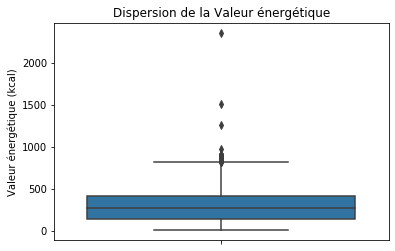

In [47]:
plot = sns.boxplot(y=food['energy-kcal_100g'])
plot.set_title('Dispersion de la Valeur énergétique')
plot.set_ylabel('Valeur énergétique (kcal)')

J'ai quelques outliers dont la valeur est supérieures à 900 kcal. Malgré mes contrôles, je constate qu'il reste des incohérences. 

Exemple avec la référence 3258561021225 (https://fr.openfoodfacts.org/produit/3258561021225/sprits-au-beurre-belle-france) où les élements saisies ont été appliquée avec un multiple de 4.55. Etiquette nutritionnelle à l'appui. Dans ce cas précis, le consommateur final à saisi les valeurs données pour 100 grammes dans les champs destinés aux valeurs à la portion (22g dans le cas de ce produit).

Je retire les observations dont la valeur énergétique est supérieur à 900 kcal.

In [48]:
food = food[food["energy-kcal_100g"] <= 900]

## 5-2. Facteurs nutritionnels

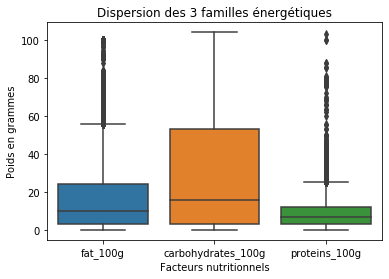

In [49]:
food_unpivot = food[['fat_100g','carbohydrates_100g','proteins_100g']].melt()

plot = sns.boxplot(x=food_unpivot['variable'], y=food_unpivot['value'])
plot.set_title('Dispersion des 3 familles énergétiques')
plot.set_ylabel('Poids en grammes')
plot.set_xlabel('Facteurs nutritionnels')
plt.show()

Je constate la encore une incohérence. Il ne peux pas y avoir 104 grammes de glucides pour 100 grammes de produit.

Je vérifie cependant l'intégralité des facteurs énergétiques, pas seulement les familles principales.

In [50]:
food[energy_fact].describe()

,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g
count,45156.000000,44455.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,813.000000,835.000000,536.000000,122.000000,35.000000,55.000000,93.000000,98.000000,9.000000,0.0,0.0,7.000000,6.000000,0.0,0.0,0.0,0.0,0.0,224.000000,147.000000,45136.000000,44421.000000,10.00000,8.000000,16.000000,96.000000,3.000000,11.000000,85.000000,67.000000,26844.000000,1.0,0.0,45151.000000,27.000000,17.000000,10.000000
mean,15.673993,6.357277,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.838095,12.543141,2.801596,1.983120,0.716114,0.652103,17.686235,4.435959,0.057556,NaN,NaN,43.157929,35.750000,NaN,NaN,NaN,NaN,NaN,0.237080,0.094786,27.822223,14.075825,5.44000,4.107500,28.999375,12.062396,14.700000,9.800000,36.369765,7.797612,2.087525,4.0,NaN,8.806578,4.580370,2.939412,0.021710
std,17.208700,8.228332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.530749,17.447835,4.968946,6.629166,0.801105,1.020250,19.111262,6.937624,0.023975,NaN,NaN,26.163468,24.728991,NaN,NaN,NaN,NaN,NaN,0.571694,0.898049,27.356706,19.916977,10.39735,5.917752,33.432164,19.821689,21.347365,7.197083,22.526011,8.946910,2.579759,NaN,NaN,7.677948,3.045643,2.434729,0.002898
min,0.000000,0.000000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.006200,0.000000,0.000000,0.000000,0.100000,0.007000,NaN,NaN,0.005500,6.900000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.100000,0.00000,0.100000,0.000000,0.000000,0.100000,1.500000,0.000000,0.000000,0.000000,4.0,NaN,0.000000,0.900000,0.300000,0.015500
25%,2.900000,0.800000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,1.800000,0.479250,0.060000,0.346500,0.062500,1.600000,0.449250,0.047000,NaN,NaN,29.050000,17.125000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,3.100000,0.900000,0.30000,0.392500,2.375000,0.000000,2.450000,1.650000,16.700000,0.000000,0.500000,4.0,NaN,3.300000,1.400000,0.300000,0.021700
50%,10.000000,3.000000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,4.600000,1.795000,0.100500,0.600000,0.400000,12.000000,0.649000,0.061000,NaN,NaN,46.000000,34.100000,NaN,NaN,NaN,NaN,NaN,0.100000,0.000000,16.000000,3.600000,1.50000,1.050000,25.500000,0.450000,4.800000,10.300000,37.000000,3.500000,1.500000,4.0,NaN,6.800000,4.200000,2.600000,0.022000
75%,24.000000,9.500000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,13.000000,3.071500,0.587500,0.950000,1.000000,25.000000,3.975000,0.064000,NaN,NaN,61.500000,51.975000,NaN,NaN,NaN,NaN,NaN,0.285000,0.031000,53.000000,21.700000,4.67500,5.617500,36.875000,8.500000,22.000000,15.450000,58.000000,15.000000,3.000000,4.0,NaN,12.000000,7.100000,5.200000,0.023750
max,100.000000,120.000000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,75.000000,68.000000,53.000000,4.900000,6.700000,71.000000,25.000000,0.090000,NaN,NaN,75.000000,70.000000,NaN,NaN,NaN,NaN,NaN,7.600000,10.900000,104.000000,104.000000,34.00000,17.000000,101.000000,58.500000,39.200000,20.000000,87.500000,28.000000,85.

Je constate des valeurs minimales négatives, ainsi que des valeurs maximales supérieures à 100. Ces faits sont incohérents car les valeurs sont données pour 100 grammes et il ne peut pas y avoir de valeur négatives. 

Je filtre ces informations.

In [51]:
# Les valeurs manquantes sont considéres comme absente temporairement de manière à filtrer les valeurs aberrantes
for var in energy_fact:
    food[var] = food[var][(food[var].fillna(0) >= 0) & (food[var].fillna(0) <= 100)]

In [52]:
food[energy_fact].describe()

,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g
count,45156.000000,44454.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,813.000000,835.000000,536.000000,122.000000,35.000000,55.000000,93.000000,98.000000,9.000000,0.0,0.0,7.000000,6.000000,0.0,0.0,0.0,0.0,0.0,224.000000,147.000000,45135.000000,44419.000000,10.00000,8.000000,15.000000,96.000000,3.000000,11.000000,85.000000,67.000000,26844.000000,1.0,0.0,45150.000000,27.000000,17.000000,10.000000
mean,15.673993,6.354721,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.838095,12.543141,2.801596,1.983120,0.716114,0.652103,17.686235,4.435959,0.057556,NaN,NaN,43.157929,35.750000,NaN,NaN,NaN,NaN,NaN,0.237080,0.094786,27.820535,14.074120,5.44000,4.107500,24.199333,12.062396,14.700000,9.800000,36.369765,7.797612,2.087525,4.0,NaN,8.804492,4.580370,2.939412,0.021710
std,17.208700,8.210752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.530749,17.447835,4.968946,6.629166,0.801105,1.020250,19.111262,6.937624,0.023975,NaN,NaN,26.163468,24.728991,NaN,NaN,NaN,NaN,NaN,0.571694,0.898049,27.354659,19.912741,10.39735,5.917752,28.329626,19.821689,21.347365,7.197083,22.526011,8.946910,2.579759,NaN,NaN,7.665225,3.045643,2.434729,0.002898
min,0.000000,0.000000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.006200,0.000000,0.000000,0.000000,0.100000,0.007000,NaN,NaN,0.005500,6.900000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.100000,0.000000,0.000000,0.100000,1.500000,0.000000,0.000000,0.000000,4.0,NaN,0.000000,0.900000,0.300000,0.015500
25%,2.900000,0.800000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,1.800000,0.479250,0.060000,0.346500,0.062500,1.600000,0.449250,0.047000,NaN,NaN,29.050000,17.125000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,3.100000,0.900000,0.30000,0.392500,2.350000,0.000000,2.450000,1.650000,16.700000,0.000000,0.500000,4.0,NaN,3.300000,1.400000,0.300000,0.021700
50%,10.000000,3.000000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,4.600000,1.795000,0.100500,0.600000,0.400000,12.000000,0.649000,0.061000,NaN,NaN,46.000000,34.100000,NaN,NaN,NaN,NaN,NaN,0.100000,0.000000,16.000000,3.600000,1.50000,1.050000,25.000000,0.450000,4.800000,10.300000,37.000000,3.500000,1.500000,4.0,NaN,6.800000,4.200000,2.600000,0.022000
75%,24.000000,9.500000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,13.000000,3.071500,0.587500,0.950000,1.000000,25.000000,3.975000,0.064000,NaN,NaN,61.500000,51.975000,NaN,NaN,NaN,NaN,NaN,0.285000,0.031000,53.000000,21.700000,4.67500,5.617500,30.250000,8.500000,22.000000,15.450000,58.000000,15.000000,3.000000,4.0,NaN,12.000000,7.100000,5.200000,0.023750
max,100.000000,100.000000,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,75.000000,68.000000,53.000000,4.900000,6.700000,71.000000,25.000000,0.090000,NaN,NaN,75.000000,70.000000,NaN,NaN,NaN,NaN,NaN,7.600000,10.900000,100.000000,100.000000,34.00000,17.000000,100.000000,58.500000,39.200000,20.000000,87.500000,28.000000,85.0

A présent, je n'ai plus d'incohérences dans les facteurs nutritionnels.

---
# 6. Extraction des catégories de premier niveau

In [53]:
food['first_category'] = food.categories.str.partition(',')[0]

In [54]:
food['category'] = 'A trier'

Je définis plusieus catégories alimentaires en fonction du contenu des données :
- Viandes - Poissons - Oeufs
- Produits laitiers
- Epicerie - Plats préparés
- Boissons
- Sucrerie et produits sucrés

J'ai aussi un catégorie 'A trier' où je regroupe des produits divers, dont je ne suis pas sur de la catégorie

In [55]:
for i in cat['category']:
    # Filtre A : Recherche d'un mot dans un chaine
    if cat['filter'][i] == 'A':
        food['category'][food['first_category'].str.lower().str.find(i) != -1] = cat['category'][i]
    # Filtre B : Recherche de l'égalité parfaite entre le mot et la chaines (cas pratique : Boissons et beverages qui intègre des produits vegan-très calorique)
    if cat['filter'][i] == 'B':
        food['category'][food['first_category'].str.lower() == i] = cat['category'][i]

In [56]:
food.groupby("category").code.count().sort_values(ascending=False).head(50)

category
Epicerie - Plats préparés      13263
Vegan                           8458
Viandes - Poissons - Oeufs      6323
Sucrerie et produits sucrés     5764
A trier                         5374
Produits laitiers               4832
Boissons                        1186
Name: code, dtype: int64

In [57]:
food.groupby("category").code.count().sort_values(ascending=False).head(50)

category
Epicerie - Plats préparés      13263
Vegan                           8458
Viandes - Poissons - Oeufs      6323
Sucrerie et produits sucrés     5764
A trier                         5374
Produits laitiers               4832
Boissons                        1186
Name: code, dtype: int64

In [58]:
# Contenu de la catégorie à trier
food[food['category'] == "A trier"].groupby("first_category").code.count().sort_values(ascending=False).head(50)

first_category
Surgelés                                  1219
Conserves                                 1012
Produits à tartiner                        715
Aliments pour bébé                         250
Édulcorants                                140
Frais                                      136
Aides culinaires                           103
Matières grasses                            42
Terrines                                    36
Compléments alimentaires                    35
Frozen foods                                32
Canned foods                                31
Vinaigres                                   23
Produits déshydratés                        22
Naposteltavat                               22
Spreads                                     19
Imbiss                                      18
Fresh foods                                 18
Botanas                                     17
Pflanzliche Lebensmittel und Getränke       16
Kasvipohjaiset ruuat ja juomat              1

---
# 6. Traitement des valeurs manquantes des variables énergétique

Dans un premier temps, je construis un nouvel objet contenant mon jeu de données réduit aux variables nécessaires à la suite de l'étude. Je rappelle que je souhaite aider le consommateur final à choisir leur produit alimentaire en fonction de leur apport énergétique.

Je conserve donc les variables suivantes :
- Code,
- Nom du produit,
- Catégorie,
- Valeur énergétique,
- et tous les facteurs énergétique.

In [59]:
reduced_columns = ['code','product_name','category','energy-kcal_100g'] + energy_fact
reduced_food = food[reduced_columns]

In [60]:
reduced_food.isna().sum()

code                                     0
product_name                           162
category                                 0
energy-kcal_100g                         0
fat_100g                                44
saturated-fat_100g                     746
-butyric-acid_100g                   45200
-caproic-acid_100g                   45200
-caprylic-acid_100g                  45200
-capric-acid_100g                    45200
-lauric-acid_100g                    45199
-myristic-acid_100g                  45200
-palmitic-acid_100g                  45200
-stearic-acid_100g                   45200
-arachidic-acid_100g                 45200
-behenic-acid_100g                   45200
-lignoceric-acid_100g                45200
-cerotic-acid_100g                   45200
-montanic-acid_100g                  45200
-melissic-acid_100g                  45200
monounsaturated-fat_100g             44387
polyunsaturated-fat_100g             44365
omega-3-fat_100g                     44664
-alpha-lino

Je constate que les facteurs énergétique les moins renseignées dans le jeu de données sont ceux ne paraissant sur l'étiquette énergétique d'un produit. Il est normal que le consommateur final ne puisse pas apporter ces informations. 

Ne connaissant pas leur présence ou dans le produit, je décide de retirer les variables ayant un taux de NaN supérieur ou égal à 95 %.

In [61]:
mask = food.isna().sum() / len(food) < 0.95
reduced_food = reduced_food.loc[:, mask]
reduced_food.isna().sum()

code                      0
product_name            162
category                  0
energy-kcal_100g          0
fat_100g                 44
saturated-fat_100g      746
carbohydrates_100g       65
sugars_100g             781
fiber_100g            18356
proteins_100g            50
dtype: int64

En approfondissant les recherches, je m'aperçois que les champs restant `fat_100g`, `saturated-fat_100g`, `carbohydrates_100g`, `sugars_100g`, `fiber_100g`, `proteins_100g` sont systématiquement sur une étiquette nutritionnelle, que le facteur nutritionnel soit inclus ou pas dans le produit.

En procédant au test d'intégration produit, j'avais le choix entre mettre un 0 ou laisser un vide dans les champs correpondant à un facteur nutritionnel égal à 0. 

Ces champs étant systématiquement sur l'étiquette, je déduis que les champs NaN sont donc équivalent à 0

In [62]:
fact = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
reduced_food[fact] = reduced_food[fact].fillna(0)
reduced_food.isna().sum()

code                    0
product_name          162
category                0
energy-kcal_100g        0
fat_100g                0
saturated-fat_100g      0
carbohydrates_100g      0
sugars_100g             0
fiber_100g              0
proteins_100g           0
dtype: int64

---
# 7. Export

In [63]:
reduced_food.shape

(45200, 10)

In [64]:
reduced_food.to_csv('src/reduced_food.csv', index=False)